In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('AB_NYC_2019.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,48885,48886,48887,48888,48889,48890,48891,48892,48893,48894
id,2539,2595,3647,3831,5022,5099,5121,5178,5203,5238,...,36482809,36483010,36483152,36484087,36484363,36484665,36485057,36485431,36485609,36487245
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm,...,Stunning Bedroom NYC! Walking to Central Park!!,Comfy 1 Bedroom in Midtown East,Garden Jewel Apartment in Williamsburg New York,"Spacious Room w/ Private Rooftop, Central loca...",QUIT PRIVATE HOUSE,Charming one bedroom - newly renovated rowhouse,Affordable room in Bushwick/East Williamsburg,Sunny Studio at Historical Neighborhood,43rd St. Time Square-cozy single bed,Trendy duplex in the very heart of Hell's Kitchen
host_id,2787,2845,4632,4869,7192,7322,7356,8967,7490,7549,...,131529729,274311461,208514239,274321313,107716952,8232441,6570630,23492952,30985759,68119814
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris,Garon,Shunichi,MaryEllen,Ben,...,Kendall,Scott,Melki,Kat,Michael,Sabrina,Marisol,Ilgar & Aysel,Taz,Christophe
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan,...,Manhattan,Manhattan,Brooklyn,Manhattan,Queens,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown,...,East Harlem,Midtown,Williamsburg,Hell's Kitchen,Jamaica,Bedford-Stuyvesant,Bushwick,Harlem,Hell's Kitchen,Hell's Kitchen
latitude,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.76489,40.80178,40.71344,...,40.79633,40.75561,40.71232,40.76392,40.69137,40.67853,40.70184,40.81475,40.75751,40.76404
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.98493,-73.96723,-73.99037,...,-73.93605,-73.96723,-73.9422,-73.99183,-73.80844,-73.94995,-73.93317,-73.94867,-73.99112,-73.98933
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt,...,Private room,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Private room,Entire home/apt,Shared room,Private room
price,149,225,150,89,80,200,60,79,79,150,...,75,200,170,125,65,70,40,115,55,90


In [2]:
df.price = np.log1p(df.price)

In [3]:
categorical = list(df.dtypes[df.dtypes == object].index)
numerical = list(df.dtypes[df.dtypes != object].index)

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
df[numerical] = df[numerical].fillna(0)
df[categorical] = df[categorical].fillna('')

In [7]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [10]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [13]:
del df_train['price']
del df_val['price']
del df_test['price']

In [14]:
numerical.remove('price')

In [15]:
df_full_train[numerical].corrwith(df_full_train.price)

id                               -0.016372
host_id                          -0.015098
latitude                          0.079057
longitude                        -0.327231
minimum_nights                    0.033435
number_of_reviews                -0.041614
reviews_per_month                -0.059804
calculated_host_listings_count    0.129138
availability_365                  0.098008
dtype: float64

In [16]:
df_full_train[numerical].corrwith(np.expm1(df_full_train.price))

id                                0.010187
host_id                           0.018853
latitude                          0.035097
longitude                        -0.154201
minimum_nights                    0.039181
number_of_reviews                -0.048133
reviews_per_month                -0.050050
calculated_host_listings_count    0.057003
availability_365                  0.081628
dtype: float64

In [17]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def test(df_train, y_train, df_val, y_val):
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(df_train.to_dict(orient='records'))
    X_val = dv.transform(df_val.to_dict(orient='records'))
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    sns.histplot(y_pred)
    sns.histplot(y_val)
    print(mse(y_pred, y_val, squared=False))
    print(mse(np.expm1(y_pred), np.expm1(y_val), squared=False))

In [19]:
categorical

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [20]:
numerical

['id',
 'host_id',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [21]:
numerical.remove('id')
numerical.remove('host_id')
categorical.remove('name')
categorical.remove('host_name')

0.473926690219137
200.83129038993033


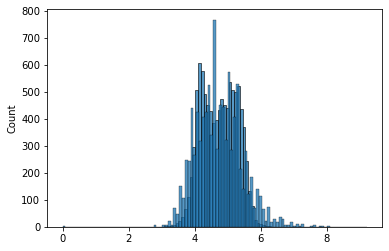

In [22]:
test(df_train[numerical+categorical],y_train,df_val[numerical+categorical],y_val)